In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
   keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled2, val_scaled, train_target2, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_input.shape)
print(train_scaled.shape)
print(train_scaled2.shape)
print(val_scaled.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)
(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [ ]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
#Compile and train the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled2, train_target2, epochs=20,validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 18s 5ms/step - loss: 0.5259 - accuracy: 0.8121 - val_loss: 0.3346 - val_accuracy: 0.8739
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3456 - accuracy: 0.8770 - val_loss: 0.2861 - val_accuracy: 0.8934
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2992 - accuracy: 0.8930 - val_loss: 0.2629 - val_accuracy: 0.9002
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2722 - accuracy: 0.9019 - val_loss: 0.2470 - val_accuracy: 0.9101
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2487 - accuracy: 0.9101 - val_loss: 0.2381 - val_accuracy: 0.9142
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2282 - accuracy: 0.9161 - val_loss: 0.2315 - val_accuracy: 0.9112
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2103 - accuracy: 0.9214 - val_loss: 0.2276 - val_accuracy

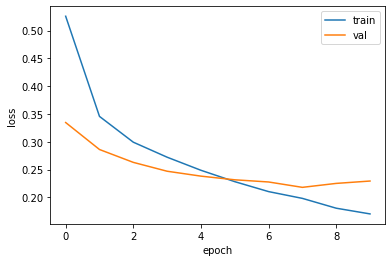

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.9216


[0.21796004474163055, 0.921583354473114]

In [ ]:
#Evaluate with the test set
test_scaled=test_input.reshape(-1,28,28,1) /255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2404 - accuracy: 0.9160


[0.24039475619792938, 0.9160000085830688]

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7f67915fba90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f6790dc8e20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f67919a7430>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f67919a7d30>, <keras.layers.reshaping.flatten.Flatten object at 0x7f67919a2400>, <keras.layers.core.dense.Dense object at 0x7f67919c3760>, <keras.layers.regularization.dropout.Dropout object at 0x7f67919c39d0>, <keras.layers.core.dense.Dense object at 0x7f67919d4970>]
(3, 3, 1, 32) (32,)
tf.Tensor(
[[[ 0.12347594]
  [-0.21764517]
  [-0.2152383 ]]

 [[ 0.24003632]
  [ 0.06358304]
  [-0.36008975]]

 [[ 0.1959142 ]
  [ 0.2676959 ]
  [-0.06101705]]], shape=(3, 3, 1), dtype=float32)
(3, 3, 32, 64) (64,)
(3, 3, 1, 32)
-0.03641931 0.3027117
(288, 1)


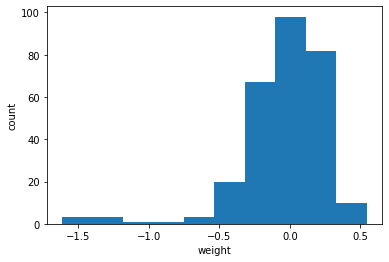


훈련된 합성곱 신경망의 가중치들


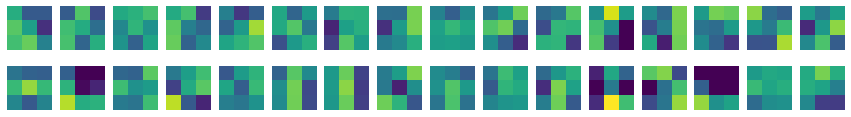

In [ ]:
model2=keras.models.load_model('best-cnn-model.h5')
print(model2.layers)

conv=model2.layers[0]
conv2=model2.layers[2]
print(conv.weights[0].shape, conv.weights[1].shape)
print(conv.weights[0][:,:,:,0])
print(conv2.weights[0].shape, conv2.weights[1].shape)

conv_weights=conv.weights[0].numpy()
print(conv_weights.shape)
print(conv_weights.mean(), conv_weights.std())
a = conv_weights.reshape(-1,1)
print(a.shape)
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

print('\n훈련된 합성곱 신경망의 가중치들')
fig, axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
   for j in range(16):
      axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
      axs[i,j].axis('off')
plt.show()

(3, 3, 1, 32)
0.0030507962 0.07910218


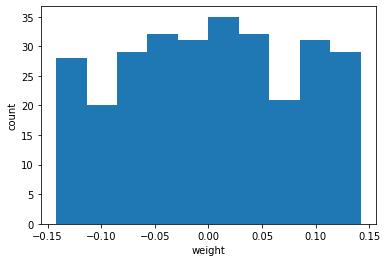


훈련되지 않은 합성곱 신경망의 가중치들


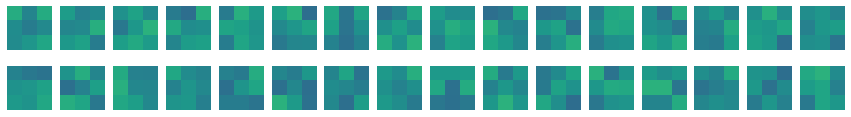

In [ ]:
#훈련되지 않은 합성곱 신경망의 가중치들
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

print('\n훈련되지 않은 합성곱 신경망의 가중치들')
fig, axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
   for j in range(16):
      axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
      axs[i,j].axis('off')
plt.show()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


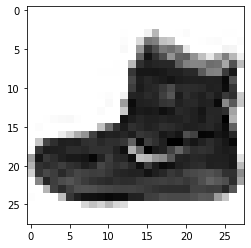

(28, 28)
(1, 28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 47ms/step
(1, 28, 28, 32)

훈련된 합성곱 신경망의 가중치들


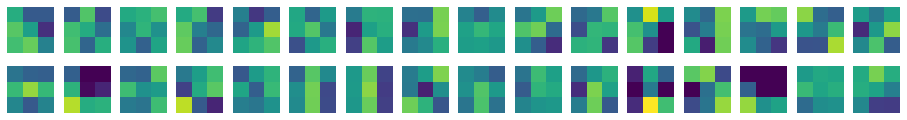

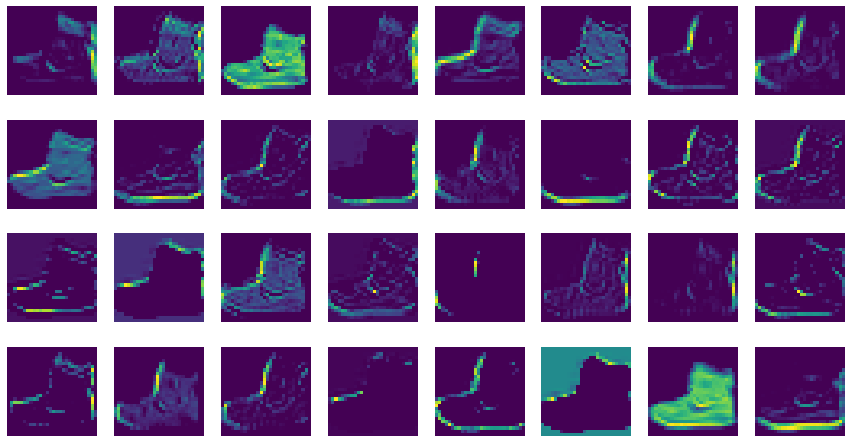

In [ ]:
#함수형 API 이용해 특성 맵 시각화하기
print(model2.input)
conv_acti=keras.Model(model2.input, model2.layers[0].output)
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

print(train_input[0].shape)
print(train_input[0:1].shape)
print(train_input[0:1].reshape(-1,28,28,1).shape)
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)
print(feature_maps.shape)

print('\n훈련된 합성곱 신경망의 가중치들')
fig, axs=plt.subplots(2,16,figsize=(16,2))
for i in range(2):
   for j in range(16):
      axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
      axs[i,j].axis('off')
plt.show()
print('\n')

fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
   for j in range(8):
      axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
      axs[i,j].axis('off')
plt.show()